In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmaps
from matplotlib.colors import LogNorm

def worldmap_norm(data, vmin=1e-30):
    projection = ccrs.PlateCarree(central_longitude=0)
    img_extent = (-180, 180, -90, 90)
    
    print(f"min {data.min()} max {data.max()}")
    log_norm = LogNorm(vmin=vmin, vmax=data.max())
    #log_norm_data = log_norm(data, clip=True)

    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    im = ax.imshow(data,
                   origin='upper',
                   extent=img_extent,
                   transform=projection,
                   cmap='GnBu',
                   norm=log_norm)
    fig.colorbar(im, ax=ax, orientation='horizontal')

def load(name, SUF='.hlf', day=356, second=86400, coef=1e12):
    if SUF == '.hlf':
        shape = (360, 720)
        maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.WFDEI.hlf'
    elif SUF == '.gl5':
        shape = (2160, 4320)
        maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.CAMA.gl5'
    dtype = 'float32' # 4バイト
    h08dir = '/home/kajiyama/H08/H08_20230612/'
    file = h08dir + name
    
    # data
    data = np.fromfile(file, dtype=dtype)
    lonlat = data.reshape(shape)
    
    # mask out
    mask = np.fromfile(maskpath, dtype=dtype)
    mask = mask.reshape(shape)
    lonlat = np.ma.masked_where(mask==0, lonlat)
    lonlat = np.ma.masked_where(lonlat>1e19, lonlat)
    
    # conversion second to year
    adm = lonlat*day*second
    
    # conversion from kg to mm3
    # 1000kg = 1m3 = 1e9mm3
    # km3 = kg/1e12
    adm = adm/coef
    
    # sum up
    total = np.sum(adm)
    print(f"total {total} km3/year")
    
    return adm

def load_times_area(name, SUF='.hlf', day=356, second=86400, coef=1e12):
    if SUF == '.hlf':
        shape = (360, 720)
        areapath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_ara_/lndara.WFDEI.hlf'
        maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.WFDEI.hlf'
    elif SUF == '.gl5':
        shape = (2160, 4320)
        areapath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_ara_/lndara.CAMA.gl5'
        maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.CAMA.gl5'
    dtype = 'float32' # 4バイト
    h08dir = '/home/kajiyama/H08/H08_20230612/'
    file = h08dir + name
    
    # area
    area = np.fromfile(areapath, dtype=dtype)
    area = area.reshape(shape)
    
    # data
    data = np.fromfile(file, dtype=dtype)
    lonlat = data.reshape(shape)
    
    # mask out
    mask = np.fromfile(maskpath, dtype=dtype)
    mask = mask.reshape(shape)
    lonlat = np.ma.masked_where(mask==0, lonlat)
    lonlat = np.ma.masked_where(lonlat>1e19, lonlat)
    
    # multiply area
    adm = lonlat*area
    
    # conversion from mm/s to mm/year
    adm = adm*day*second
    
    # conversion from kg to mm3
    # 1000kg = 1m3 = 1e9mm3
    # km3 = kg/1e12
    adm = adm/coef
    
    # sum up
    total = np.sum(adm)
    print(f"total {total} km3/year")
    
    return adm

total 411403250218.35986 km3/year
min 0.0 max 8358408.715920999
total 252135955505.06473 km3/year
min 0.0 max 84985219.25411144


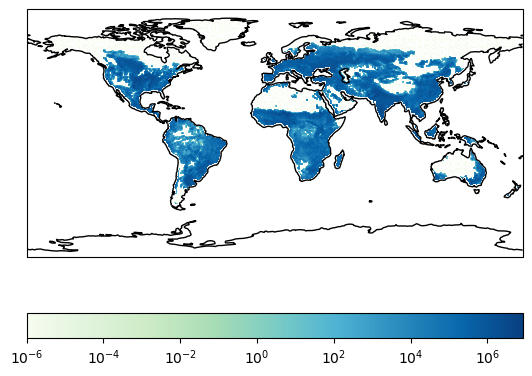

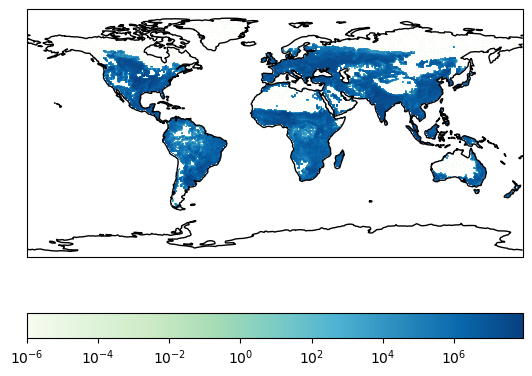

In [40]:
image = load_times_area(name='crp/out/cwd_1st0/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load_times_area(name='crp/out/cwd_1st0/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

total 1473926830115.9575 km3/year
min 0.0 max 8360590.290871911
total 1373425439830.1648 km3/year
min 0.0 max 121465640.24468766


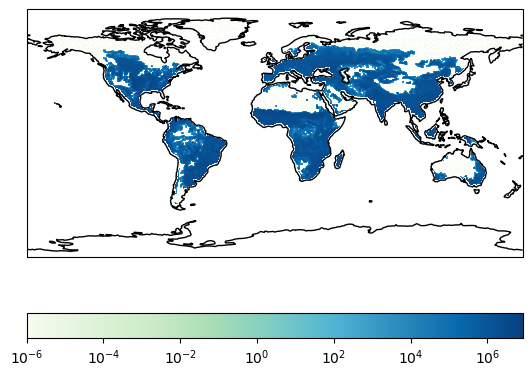

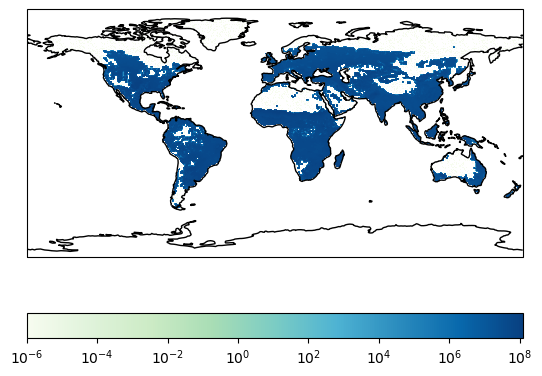

In [37]:
image = load_times_area(name='crp/out/cwd_1st1/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load_times_area(name='crp/out/cwd_1st1/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

total 1055438584551.895 km3/year
min 0.0 max 12087833.56255273
total 957737041285.8513 km3/year
min 0.0 max 195279235.9565525


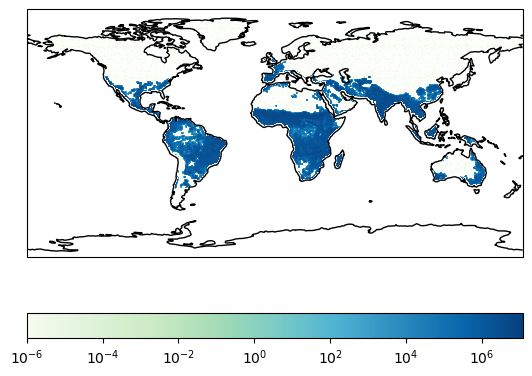

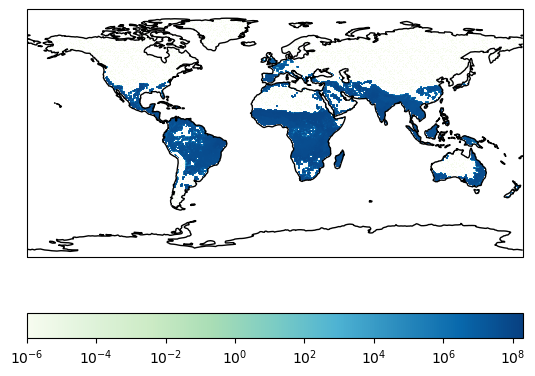

In [41]:
image = load_times_area(name='crp/out/cwd_2nd0/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load_times_area(name='crp/out/cwd_2nd0/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

total 1055438584551.895 km3/year
min 0.0 max 12087833.56255273
total 957737041285.8513 km3/year
min 0.0 max 195279235.9565525


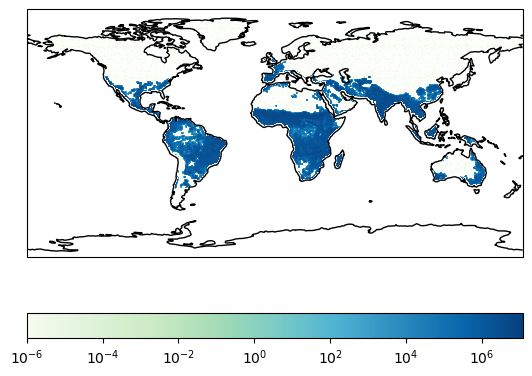

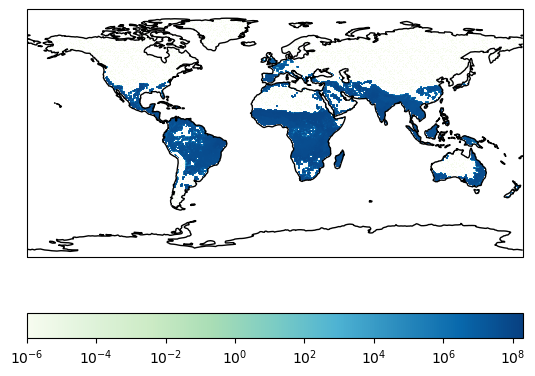

In [42]:
image = load_times_area(name='crp/out/cwd_2nd1/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load_times_area(name='crp/out/cwd_2nd1/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

total 16936704694905.23 km3/year
min 0.0 max 159042896.23942104
total 40068396362978.234 km3/year
min -3.6524727905273436e-06 max 7258549211.041157


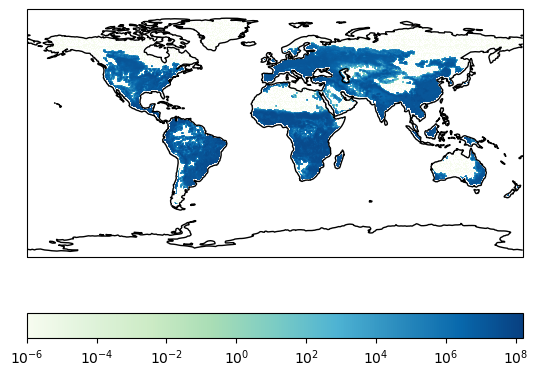

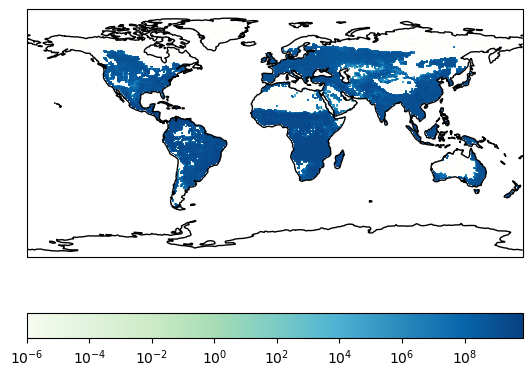

In [46]:
image = load_times_area(name='crp/out/yld_1st0/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load_times_area(name='crp/out/yld_1st0/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

total 200953588176.73102 km3/year
min 0.0 max 788760.0199139328
total 297689131017.3523 km3/year
min 0.0 max 27202752.398072217


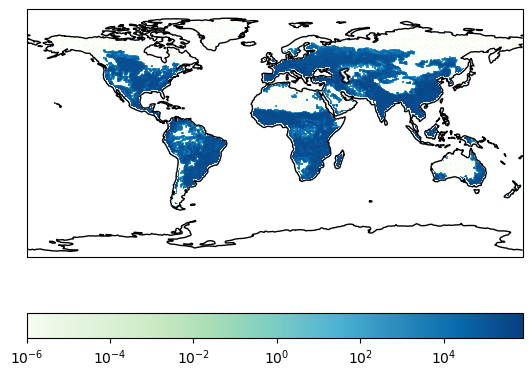

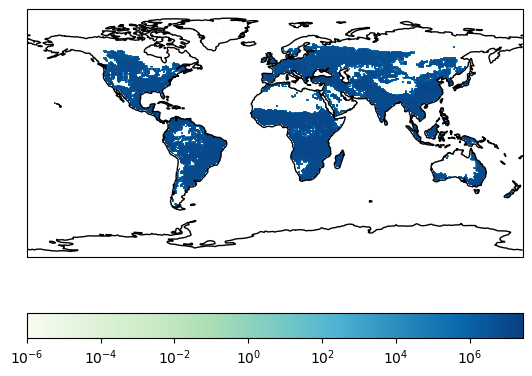

In [51]:
image = load_times_area(name='crp/out/crp_1st_/W5E5__C_00000000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load_times_area(name='crp/out/crp_1st_/W5E5__C_00000000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

total 411403250218.35986 km3/year
min 0.0 max 8358408.715920999
total 252135955505.06473 km3/year
min 0.0 max 84985219.25411144


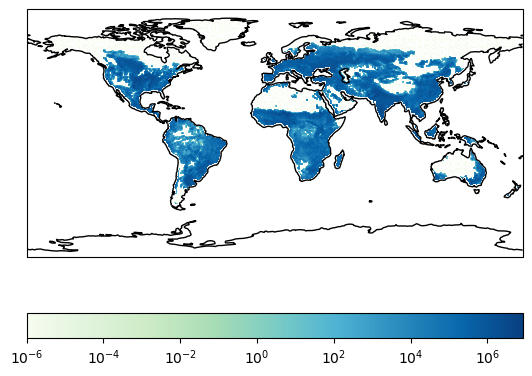

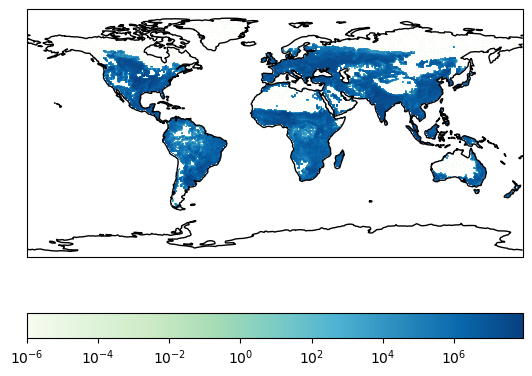

In [48]:
image = load_times_area(name='crp/out/cwd_1st0/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load_times_area(name='crp/out/cwd_1st0/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

total 106140607667.57777 km3/year
min 0.0 max 1339506.1358198784
total 135350067622.04947 km3/year
min 0.0 max 50504367.532828264


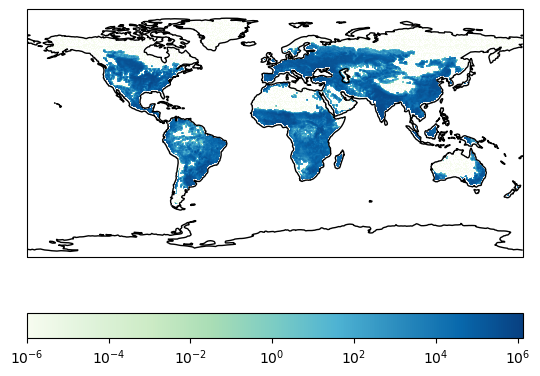

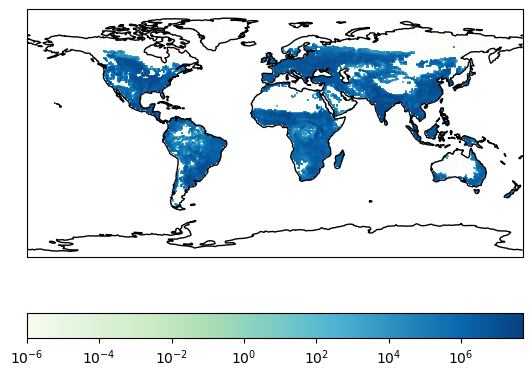

In [52]:
image = load_times_area(name='crp/out/cws_1st0/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load_times_area(name='crp/out/cws_1st0/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

total 5857691252.113601 km3/year
min 0.0 max 1339382.6521546752
total 11245172454.43374 km3/year
min 0.0 max 50095037.3926699


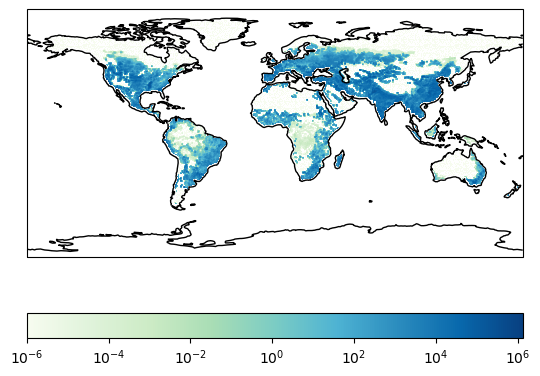

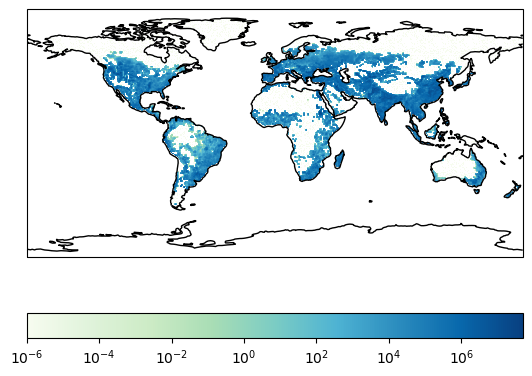

In [53]:
image = load_times_area(name='crp/out/cwsb1st0/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load_times_area(name='crp/out/cwsb1st0/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)